In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.offline as py
import plotly.tools as tls

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
%matplotlib inline

py.init_notebook_mode(connected=True)

pio.templates.default = "plotly_dark"
matplotlib.style.use('dark_background')

In [2]:
data = pd.read_csv("Speed Dating Data.csv", encoding = "ISO-8859-1")

## Speed Dating ##

##### Part 1 : Presentation & cleaning of the dataset #####

In [3]:
data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


Let's check the basic stats of the data

In [4]:
# Basic stats
print("Number of rows : {}".format(data.shape[0]))
print("Number of columns : {}".format(data.shape[1]))
print()
print("Basics statistics: ")
data_desc = data.describe(include='all')
display(data_desc)
print()
data.isna().sum()
print("Percentage of missing values: ")
display(100*data.isnull().sum()/data.shape[0])

Number of rows : 8378
Number of columns : 195

Basics statistics: 


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000



Percentage of missing values: 


iid          0.000000
id           0.011936
gender       0.000000
idg          0.000000
condtn       0.000000
              ...    
attr5_3     75.936978
sinc5_3     75.936978
intel5_3    75.936978
fun5_3      75.936978
amb5_3      75.936978
Length: 195, dtype: float64

How many unique participants do we have in the dataset?

In [5]:
# Unique participants
data_unique = data.drop_duplicates(subset=["iid"], keep="first").copy()
data_unique.shape

(551, 195)

We have 551 unique participants

Cleaning the data to make our dataset more understandable

In [6]:
# gender
data_unique["gender"] = data_unique["gender"].apply(lambda x: "Woman" if x == 0 else "Man" if x ==1 else x)
 
# race
data_unique["race"] = data_unique["race"].apply(lambda x: "Black/African" if x==1 
                                                         else "White-Caucasian/European" if x==2
                                                         else "Latino/Hispanic" if x==3
                                                         else "Asian" if x==4
                                                         else "Native American" if x==5
                                                         else "Other" if x==6
                                                         else x)

# race of partner
data_unique["race_o"] = data_unique["race"].apply(lambda x: "Black/African" if x==1 
                                                         else "Caucasian/European" if x==2
                                                         else "Latino/Hispanic" if x==3
                                                         else "Asian" if x==4
                                                         else "Native American" if x==5
                                                         else "Other" if x==6
                                                         else x)

# same race
data_unique["samerace"] = data_unique["samerace"].apply(lambda x: "No" if x==0
                                                                else "Yes" if x==1
                                                                else x)

# importance of race
data_unique["imprace"] = data_unique["imprace"].apply(lambda x: "Not important" if x==0
                                                                else "Not important" if x==1
                                                                else "Not important" if x==2
                                                                else "Not important" if x==3
                                                                else "Not important" if x==4
                                                                else "Not important" if x==5
                                                                else "Important" if x==6
                                                                else "Important" if x==7
                                                                else "Very important" if x==8
                                                                else "Very important" if x==9
                                                                else "very important" if x==10
                                                                else x)

# match
# data_unique["match"] = data_unique["match"].apply(lambda x: "No" if x==0
                                                         # else "Yes" if x==1
                                                         # else x)

# field_cd
data_unique["field_cd"] = data_unique["field_cd"].apply(lambda x: "Law" if x==1
                                                            else "Math" if x==2
                                                            else "Social Science/Psychologist" if x==3
                                                            else "Medical Science" if x==4
                                                            else "Engineering" if x==5
                                                            else "English/Creative/Journalism" if x==6
                                                            else "History/Religion/Philosophy" if x==7
                                                            else "Business/Finance" if x==8
                                                            else "Education/Academia" if x==9
                                                            else "Biological Sciences/Chemistry/Physics" if x==10
                                                            else "Social Work" if x==11
                                                            else "Undergrad/Undecide" if x==12
                                                            else "Political Science/International Affairs" if x==13
                                                            else "Film" if x==14
                                                            else "Fine Arts/Arts Administration" if x==15
                                                            else "Languages" if x==16
                                                            else "Architecture" if x==17
                                                            else "Other" if x==18
                                                            else x)

# career_c
data_unique["career_c"] = data_unique["career_c"].apply(lambda x: "Law" if x==1
                                                            else "Math" if x==2
                                                            else "Social Science/Psychologist" if x==3
                                                            else "Medical Science" if x==4
                                                            else "Engineering" if x==5
                                                            else "English/Creative/Journalism" if x==6
                                                            else "History/Religion/Philosophy" if x==7
                                                            else "Business/Finance" if x==8
                                                            else "Education/Academia" if x==9
                                                            else "Biological Sciences/Chemistry/Physics" if x==10
                                                            else "Social Work" if x==11
                                                            else "Undergrad/Undecide" if x==12
                                                            else "Political Science/International Affairs" if x==13
                                                            else "Film" if x==14
                                                            else "Fine Arts/Arts Administration" if x==15
                                                            else "Languages" if x==16
                                                            else "Architecture" if x==17
                                                            else "Other" if x==18
                                                            else x)

# importance of religion
data_unique["imprelig"] = data_unique["imprelig"].apply(lambda x: "Not important" if x==0
                                                            else "Not important" if x==1
                                                            else "Not important" if x==2
                                                            else "Not important" if x==3
                                                            else "Not important" if x==4
                                                            else "Not important" if x==5
                                                            else "Important" if x==6
                                                            else "Important" if x==7
                                                            else "Very Important" if x==8
                                                            else "Very Important" if x==9
                                                            else "Very Important" if x==10
                                                            else x)

# decicion after a date
data_unique["dec"] = data_unique["dec"].apply(lambda x: "No" if x==0
                                                   else "Yes" if x==1
                                                   else x)

# decision of the partner
# data_unique["dec_o"] = data_unique["dec_o"].apply(lambda x: "No" if x==0
                                                   # else "Yes" if x==1
                                                   # else x)

# goal
data_unique["goal"] = data_unique["goal"].apply(lambda x: "Seemed like a fun night out" if x==1
                                                    else "To meet new people" if x==2
                                                    else "To get a date" if x==3
                                                    else "Looking for a serious relationship" if x==4
                                                    else "To say I did it" if x==5
                                                    else "Other" if x==6
                                                    else x)

# date
data_unique["date"] = data_unique["date"].apply(lambda x: "Several times a week" if x==1
                                                    else "Twice a week" if x==2
                                                    else "Once a week" if x==3
                                                    else "Twice a month" if x==4
                                                    else "Once a month" if x==5
                                                    else "Several times a year" if x==6
                                                    else "Almost never" if x==7
                                                    else x)

# go_out
data_unique["go_out"] = data_unique["go_out"].apply(lambda x: "Several times a week" if x==1
                                                    else "Twice a week" if x==2
                                                    else "Once a week" if x==3
                                                    else "Twice a month" if x==4
                                                    else "Once a month" if x==5
                                                    else "Several times a year" if x==6
                                                    else "Almost never" if x==7
                                                    else x)

# satis_2
data_unique["satis_2"] = data_unique["satis_2"].apply(lambda x: "Not at all satisfied" if x==1
                                                        else "Not at all satisfied" if x==2
                                                        else "Not at all satisfied" if x==3
                                                        else "Not at all satisfied" if x==4
                                                        else "Not at all satisfied" if x==5
                                                        else "Satisfied" if x==6
                                                        else "Satisfied" if x==7
                                                        else "Satisfied" if x==8
                                                        else "Extremely satisfied" if x==9
                                                        else "Extremely satisfied" if x==10
                                                        else x)

Let's check the result of our cleaning! How many women and men do we have?

In [7]:
data_unique["gender"].value_counts()

Man      277
Woman    274
Name: gender, dtype: int64

In [8]:
# We create 2 variables to make our anaylsis easier
data_men = data_unique.loc[data_unique["gender"] == "Man",:]
data_women = data_unique.loc[data_unique["gender"] == "Woman",:]

#### Part 2 : Exploration of the dataset ####

Let's see the ages of the participants

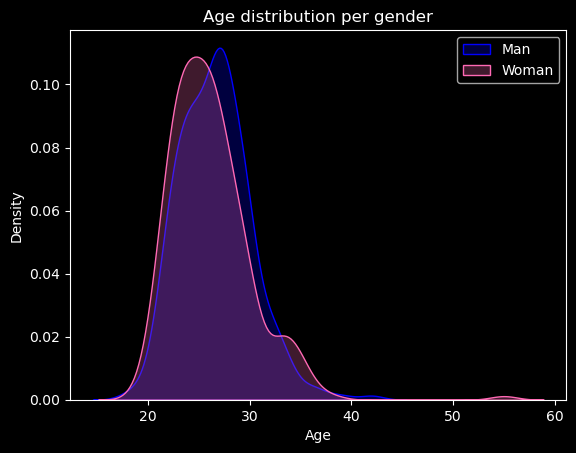

In [9]:
# Age distribution 
sns.kdeplot(data_unique[data_unique.gender == "Man"].age,
             shade=True, color='blue', label='Man')
sns.kdeplot(data_unique[data_unique.gender == "Woman"].age,
             shade=True, color='hotpink', label="Woman")
plt.title("Age distribution per gender")
plt.xlabel("Age")
plt.legend()


The participants are quite young, most of them between 20 and 30 years old

Let's see the races of the participants 

In [10]:
data_unique["race"].value_counts()

White-Caucasian/European    304
Asian                       136
Latino/Hispanic              42
Other                        37
Black/African                26
Name: race, dtype: int64

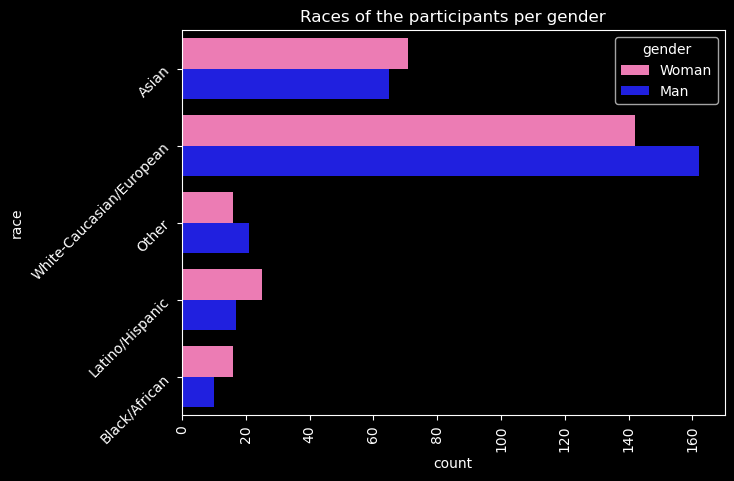

In [11]:
# Races of participants
palette = {"Man":"blue",
           "Woman":"hotpink"}
fig = plt.figure(figsize = (7,5))
fig = sns.countplot(y = "race", data = data_unique, hue = "gender", palette=palette).set(title="Races of the participants per gender")
fig = plt.xticks(rotation=90)
fig = plt.yticks (rotation = 45, fontsize = 10)

A very large majority are Caucasian types (women like men)

Does the races matter for the participants?

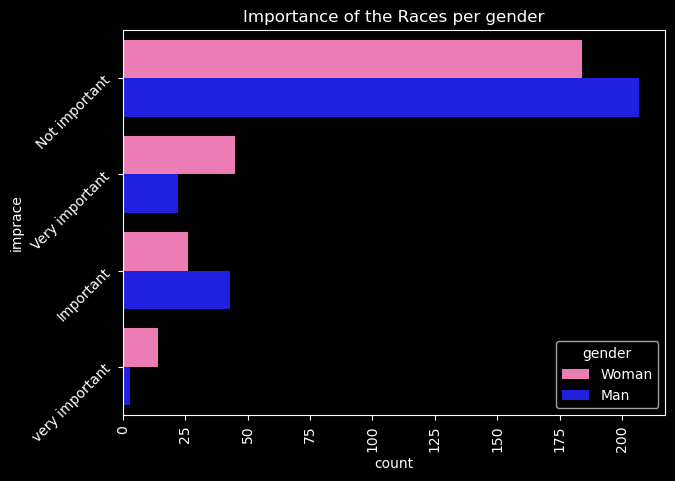

In [12]:
fig = plt.figure(figsize = (7,5))
fig = sns.countplot(y = "imprace", data = data_unique, hue = 'gender', palette=palette).set(title="Importance of the Races per gender")
fig = plt.xticks(rotation=90)
fig = plt.yticks (rotation = 45, fontsize = 10)

For men, the importance of the race doesn't matter. Unlike women who are more concerned with the importance of religion

Let's see the what are the decisions for a second date for the participants with the same race

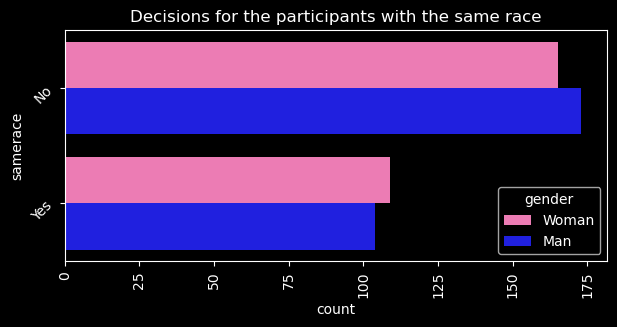

In [13]:
fig = plt.figure(figsize = (7,3))
fig = sns.countplot(y = "samerace", data = data_unique, hue = "gender", palette=palette).set(title="Decisions for the participants with the same race")
fig = plt.xticks(rotation=90)
fig = plt.yticks (rotation = 45, fontsize = 10)

Men tend to say "NO" to women with the same race. However, women tend to say "YES" to the men with the same race

Let's see if religion has the same importance to men and women

In [14]:
data_unique["imprelig"].value_counts()

Not important     404
Very Important     71
Important          69
Name: imprelig, dtype: int64

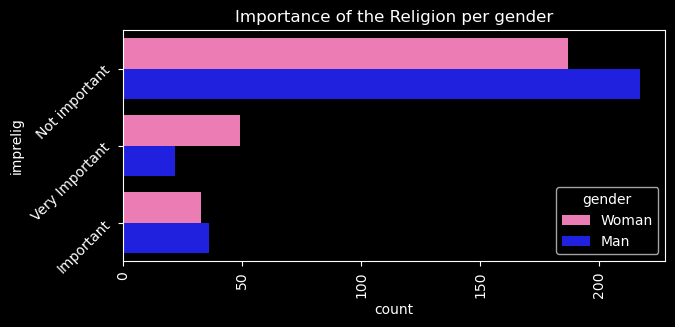

In [15]:
# Importance of the religion
fig = plt.figure(figsize = (7,3))
fig = sns.countplot(y = "imprelig", data = data_unique, hue = "gender", palette=palette).set(title="Importance of the Religion per gender")
fig = plt.xticks(rotation=90)
fig = plt.yticks (rotation = 45, fontsize = 10)

For men, the religion is not that important. For women it is.

Let's see the distribution of the participants's studies

In [16]:
data_unique["field_cd"].value_counts()

Business/Finance                           130
Biological Sciences/Chemistry/Physics       61
Engineering                                 56
Law                                         48
Political Science/International Affairs     46
Social Science/Psychologist                 46
Education/Academia                          40
Social Work                                 30
English/Creative/Journalism                 21
History/Religion/Philosophy                 17
Math                                        14
Fine Arts/Arts Administration               11
Medical Science                              9
Film                                         7
Languages                                    3
Other                                        3
Undergrad/Undecide                           1
Architecture                                 1
Name: field_cd, dtype: int64

They mostly study finance, then the fields of study that we see the most are sciences, engineering, law, political science etc.
Now let's check exactly which studies are dominant in men and women to give us an idea


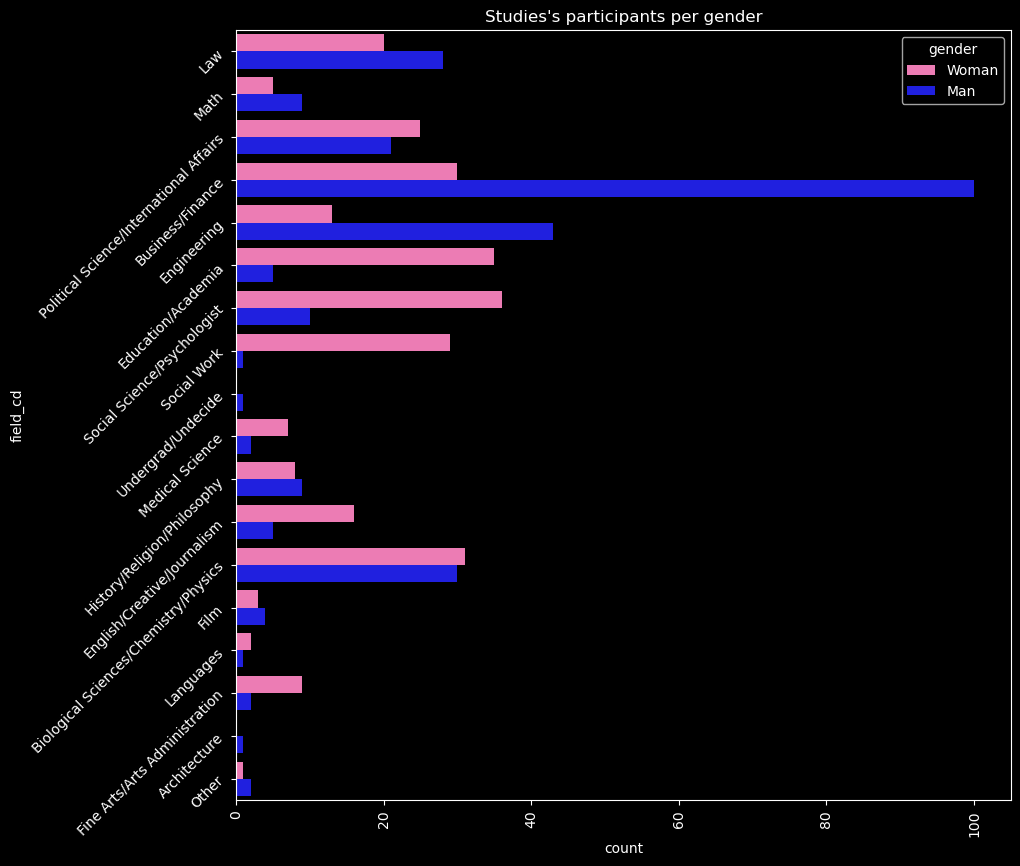

In [17]:
# Participants's studies per gender
fig = plt.figure(figsize = (10,10))
fig = sns.countplot(y = "field_cd", data = data_unique, hue = "gender", palette=palette).set(title="Studies's participants per gender")
fig = plt.xticks(rotation=90)
fig = plt.yticks (rotation = 45, fontsize = 10)

 - Men mostly study finance, law & engineering.
 - Women mosylu study Political Science, Education, social science, social work

Are these participants studies related to their intended career choice?

In [18]:
data_unique["career_c"].value_counts()

Math                                       152
History/Religion/Philosophy                144
Law                                         47
English/Creative/Journalism                 46
Education/Academia                          35
Medical Science                             26
Biological Sciences/Chemistry/Physics       25
Social Science/Psychologist                 17
Engineering                                 14
Social Work                                 14
Fine Arts/Arts Administration                5
Political Science/International Affairs      5
Business/Finance                             3
Undergrad/Undecide                           2
Languages                                    2
Film                                         1
Architecture                                 1
Name: career_c, dtype: int64

Most of participant career's field are math, History/Religion/Philosophy. Then we have Law, english, education, medical science, social science, engineering & social work in the next positions.

Now let's check the result in more details.

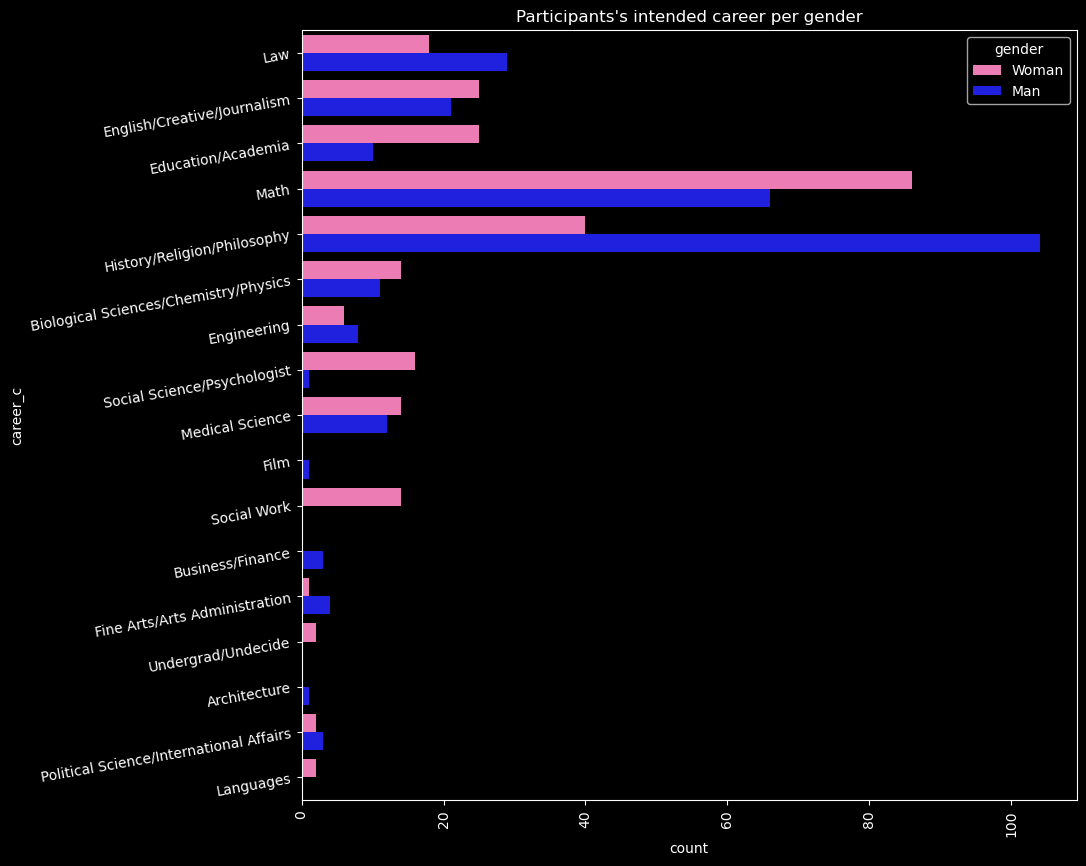

In [19]:
# Participants's career per gender
fig = plt.figure(figsize = (10,10))
fig = sns.countplot(y = "career_c", data = data_unique, hue = "gender", palette=palette).set(title="Participants's intended career per gender")
fig = plt.xticks(rotation=90)
fig = plt.yticks (rotation = 10, fontsize = 10)

 - Men  
 - Women

Let's see what are the reasons for attending meetings per gender

In [20]:
data_unique["goal"].value_counts()

Seemed like a fun night out           228
To meet new people                    189
To get a date                          40
To say I did it                        35
Other                                  30
Looking for a serious relationship     22
Name: goal, dtype: int64

 - Participants seem to want to have fun more than anything else. 
 - We also have many participants who want to meet new people.
 - Conversely, very few people want a serious relationship.

Let's check the distributions per gender 

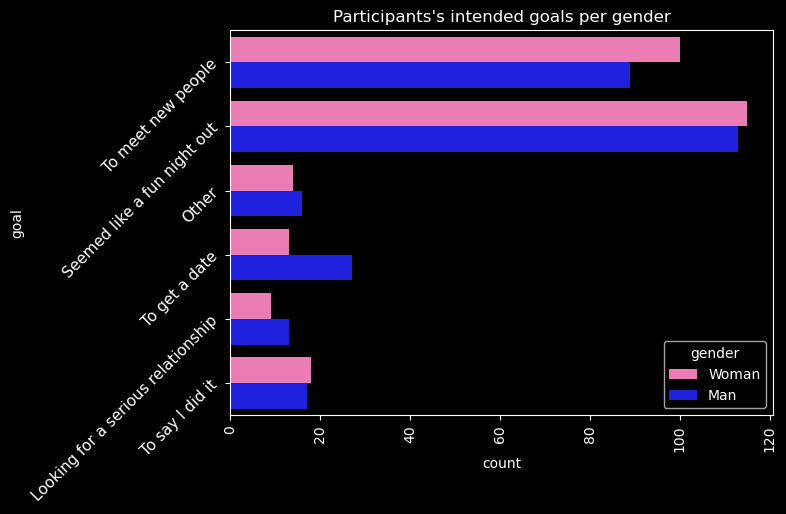

In [21]:
# Distributions of goals per gender 
fig = plt.figure(figsize = (7,5))
fig = sns.countplot(y = "goal", data = data_unique, hue = "gender", palette=palette).set(title="Participants's intended goals per gender")
fig = plt.xticks(rotation=90)
fig = plt.yticks (rotation = 45, fontsize = 11)

 - There are about as many men and women who want to meet new people
 - Many more men and women who are there to have a good time
 - Men are there just to have a date
 - More men than women want a serious relationship


Let' see how frequently do the participants go on dates

In [22]:
data_unique["date"].value_counts()

Several times a year    136
Twice a month           131
Once a month             99
Almost never             94
Once a week              54
Twice a week             22
Several times a week      7
Name: date, dtype: int64

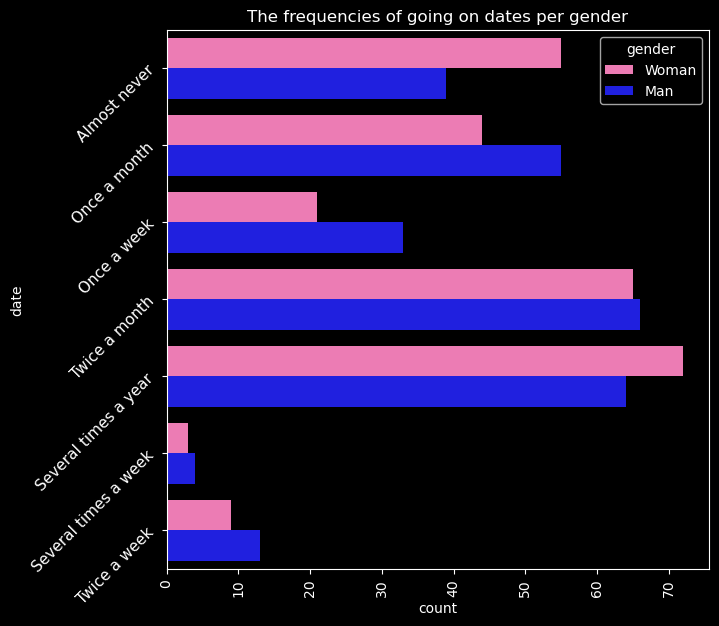

In [23]:
# The frenquencies of going on dates per gender
fig = plt.figure(figsize = (7,7))
fig = sns.countplot(y = "date", data = data_unique, hue = "gender", palette=palette).set(title="The frequencies of going on dates per gender")
fig = plt.xticks(rotation=90)
fig = plt.yticks (rotation = 45, fontsize = 11)

 - More Women than men almost never going on date
 - More men than women going on date once a month
 - As many women as men going on date twice a month
 - More women than men going on date several times a year

Let's see how often do the participants go out (not necessarily on dates)

In [24]:
data_unique["go_out"].value_counts()

Twice a week            191
Several times a week    177
Once a week             127
Twice a month            29
Once a month             12
Several times a year      6
Almost never              2
Name: go_out, dtype: int64

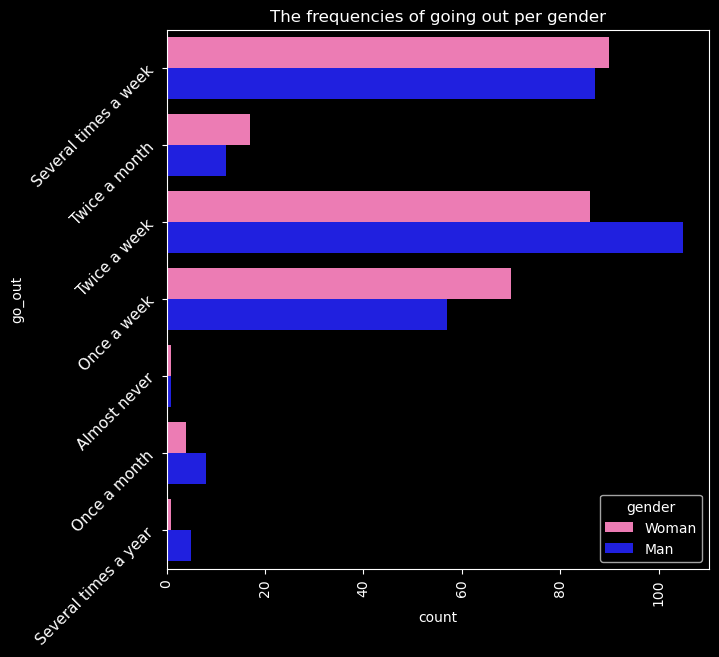

In [25]:
# The frenquencies of going out per gender
fig = plt.figure(figsize = (7,7))
fig = sns.countplot(y = "go_out", data = data_unique, hue = "gender", palette=palette).set(title="The frequencies of going out per gender")
fig = plt.xticks(rotation=90)
fig = plt.yticks (rotation = 45, fontsize = 11)

You can see that almost as many women as men go out

Let's see the interests for hobbies per gender

In [26]:
shared_interests = data[["gender","sports", "tvsports", "exercise", "dining", "museums", "art", "hiking", "gaming", "clubbing", "reading", "tv", "theater", "movies", "concerts", "music", "shopping", "yoga"]].groupby("gender").mean()
cols_interests = ["Sports", "TV Sports", "Exercise/Gym", "Dining", "Museums", "Art", "Hiking", "Gaming", "Clubbing", "Reading", "Watching TV", "Theater", "Movies/Cinema", "Concers", "Music", "Shopping", "Yoga"]
shared_interests.columns = cols_interests

men_interests = go.Bar(
    y=list(shared_interests.iloc[1]),      # 1 == Men
    x=shared_interests.columns.values,
    name="Men",
    marker=dict(
        color="blue"
    )
)
women_interests = go.Bar(
    y=list(shared_interests.iloc[0]),      # 0 == Women
    x=shared_interests.columns.values,
    name="Women",
    marker=dict(
        color="hotpink"
    )
)

data_interests = [men_interests, women_interests]
layout = go.Layout(
    title="Hobbies per gender",
    font=dict(
        size=15
    ),
    legend=dict(
        font=dict(
            size=15
        )
    )
)
fig = go.Figure(data=data_interests, layout=layout)
py.iplot(fig, filename='barchart')

 - Men prefere do sports, watch tv sports and gaming more than women
 - Women prefer to go to the gym, visit museums, shopping & yoga
 - Both of them seem to like clubbing, reading, going to cinema and listening music

Now let's see what participants are looking for in the oppposite sex (before the date)

In [27]:
# Visualisation
attributes_gender1_1 = data[["gender","attr1_1", "sinc1_1","intel1_1","fun1_1","amb1_1","shar1_1"]].groupby("gender").mean()
cols = ["Attractive","Sincere","Intelligente","Fun","Ambituous","Shared Interests"]
attributes_gender1_1.columns = cols

men1_1 = go.Bar(
    y=list(attributes_gender1_1.iloc[1]),      # 1 == Man
    x=attributes_gender1_1.columns.values,
    name="Men",
    marker=dict(
        color="blue"
    )
)
women1_1 = go.Bar(
    y=list(attributes_gender1_1.iloc[0]),      # 0 == Woman
    x=attributes_gender1_1.columns.values,
    name="Women",
    marker=dict(
        color="hotpink"
    )
)

data1_1 = [men1_1, women1_1]
layout = go.Layout(
    title="What people are looking for in the oppposite sex",
    font=dict(
        size=16
    ),
    legend=dict(
        font=dict(
            size=16
        )
    )
)
fig = go.Figure(data=data1_1, layout=layout)
py.iplot(fig, filename="barchart")




# Scatterpolar for another good visualisation
fig1_1 = go.Figure()

fig1_1.add_trace(go.Scatterpolar(
      r=[data_men["attr1_1"].mean(), data_men["sinc1_1"].mean() , data_men["intel1_1"].mean(),data_men["fun1_1"].mean(),data["amb1_1"].mean(),data_men["shar1_1"].mean() ],
      theta=cols,
      fill="toself",
      name="Men",
      marker=dict(
        color="blue"
    )
))
fig1_1.add_trace(go.Scatterpolar(
      r=[data_women["attr1_1"].mean(), data_women["sinc1_1"].mean() , data_women["intel1_1"].mean(),data_women["fun1_1"].mean(),data_women["amb1_1"].mean(),data_women["shar1_1"].mean() ],
      theta=cols,
      fill="toself",
      name="Women",
       marker=dict(
        color="hotpink"
    )
))

 - Men prefer attractive women
 - Women are looking for sincere, smart, and ambitious men

Let's  see now what People Think the Opposite Sex is Looking For

In [28]:
# Visualisation
attributes_gender2_1 = data[["gender","attr2_1", "sinc2_1","intel2_1","fun2_1","amb2_1","shar2_1"]].groupby("gender").mean()
cols = ["Attractive","Sincere","Intelligente","Fun","Ambituous","Shared Interests"]
attributes_gender2_1.columns = cols


men2_1 = go.Bar(
    y=list(attributes_gender2_1.iloc[1]),      # 1 == Men
    x=attributes_gender2_1.columns.values,
    name="Men",
    marker=dict(
        color="blue"
    )
)
women2_1 = go.Bar(
    y=list(attributes_gender2_1.iloc[0]),      # 0 == Women
    x=attributes_gender2_1.columns.values,
    name="Women",
    marker=dict(
        color="hotpink"
    )
)

data2_1 = [men2_1, women2_1]
layout = go.Layout(
    title="What People Think the Opposite Sex is Looking For",
    font=dict(
        size=16
    ),
    legend=dict(
        font=dict(
            size=16
        )
    )
)
fig = go.Figure(data=data2_1, layout=layout)
py.iplot(fig, filename="barchart")




# Scatterpolar for another good visualisation
fig2_1 = go.Figure()
fig2_1.add_trace(go.Scatterpolar(
      r=[data_men["attr2_1"].mean(), data_men["sinc2_1"].mean() , data_men["intel2_1"].mean(),data_men["fun2_1"].mean(),data["amb2_1"].mean(),data_men["shar2_1"].mean() ],
      theta=cols,
      fill="toself",
      name="Men",
      marker=dict(
        color="blue"
    )
))
fig2_1.add_trace(go.Scatterpolar(
      r=[data_women["attr2_1"].mean(), data_women["sinc2_1"].mean() , data_women["intel2_1"].mean(),data_women["fun2_1"].mean(),data_women["amb2_1"].mean(),data_women["shar2_1"].mean() ],
      theta=cols,
      fill="toself",
      name="Women",
       marker=dict(
        color="hotpink"
    )
))

 - Men think women are looking for smart, ambitious, funny & sincere men
 - Women think men are looking for Attractive & funny men

Let's see how participants rate their own attibutes

In [29]:
# Visulalisation
attributes_gender3_1 = data[["gender","attr3_1", "sinc3_1","intel3_1","fun3_1","amb3_1"]].groupby("gender").mean()
cols3 = ["Attractive","Sincere","Intelligente","Fun","Ambituous"]
attributes_gender3_1.columns = cols3


men3_1 = go.Bar(
    y=list(attributes_gender3_1.iloc[1]),      # 1 == Men
    x=attributes_gender3_1.columns.values,
    name="Men",
    marker=dict(
        color="blue"
    )
)
women3_1 = go.Bar(
    y=list(attributes_gender3_1.iloc[0]),      # 0 == Women
    x=attributes_gender3_1.columns.values,
    name="Women",
    marker=dict(
        color="hotpink"
    )
)

data3_1 = [men3_1, women3_1]
layout = go.Layout(
    title="How participants rate their own attributes",
    font=dict(
        size=16
    ),
    legend=dict(
        font=dict(
            size=16
        )
    )
)
fig = go.Figure(data=data3_1, layout=layout)
py.iplot(fig, filename='barchart')




# Scatterpolar for another good visualisation
fig3_1 = go.Figure()
fig3_1.add_trace(go.Scatterpolar(
        r=[data_men["attr3_1"].mean(), data_men["sinc3_1"].mean() , data_men["intel3_1"].mean(),data_men["fun3_1"].mean(),data_men["amb3_1"].mean()],
        theta=cols3,
        name="Men",
        fill="toself",
        marker=dict(
        color="blue"
    )
))
fig3_1.add_trace(go.Scatterpolar(
      r=[data_women["attr3_1"].mean(), data_women["sinc3_1"].mean() , data_women["intel3_1"].mean(),data_women["fun3_1"].mean(),data_women["amb3_1"].mean()],
      theta=cols3,
      name="Women",
      fill="toself",
       marker=dict(
        color="hotpink"
    )
))

- Men tend to feel more intelligente than women
- Women tend to feel more attractive, sincere, and fun than men
- Both of them tend to feel ambitious

Let's what participants think MOST of their fellow men/women look for in the opposite sex

In [30]:
# Visualisation
attributes_gender4_1 = data[["gender","attr4_1", "sinc4_1","intel4_1","fun4_1","amb4_1","shar4_1"]].groupby("gender").mean()
cols = ["Attractive","Sincere","Intelligente","Fun","Ambituous","Shared Interests"]
attributes_gender4_1.columns = cols


men4_1 = go.Bar(
    y=list(attributes_gender4_1.iloc[1]),      # 1 == Men
    x=attributes_gender4_1.columns.values,
    name="Men",
    marker=dict(
        color="blue"
    )
)
women4_1 = go.Bar(
    y=list(attributes_gender4_1.iloc[0]),      # 0 == Women
    x=attributes_gender4_1.columns.values,
    name="Women",
    marker=dict(
        color="hotpink"
    )
)

data4_1 = [men4_1, women4_1]
layout = go.Layout(
    title="What participants think MOST of their fellow men/women look for in the opposite sex",
    font=dict(
        size=16
    ),
    legend=dict(
        font=dict(
            size=16
        )
    )
)
fig = go.Figure(data=data4_1, layout=layout)
py.iplot(fig, filename='barchart')




# Scatterpolar for another good visualisation
fig4_1 = go.Figure()
fig4_1.add_trace(go.Scatterpolar(
      r=[data_men["attr4_1"].mean(), data_men["sinc4_1"].mean() , data_men["intel4_1"].mean(),data_men["fun4_1"].mean(),data["amb4_1"].mean(),data_men["shar4_1"].mean() ],
      theta=cols,
      fill="toself",
      name="Men",
      marker=dict(
        color="blue"
    )
))
fig4_1.add_trace(go.Scatterpolar(
      r=[data_women["attr4_1"].mean(), data_women["sinc4_1"].mean() , data_women["intel4_1"].mean(),data_women["fun4_1"].mean(),data_women["amb4_1"].mean(),data_women["shar4_1"].mean() ],
      theta=cols,
      fill="toself",
      name="Women",
       marker=dict(
        color="hotpink"
    )
))

- Men think most of their fellow men are looking for attractive and intelligente women
- Women think most of their fellow women are looking for attractive, sincere, intelligente and ambitious men

Let's see how do participants think others perceive them

In [31]:
# Visualisation
attributes_gender5_1 = data[["gender","attr5_1", "sinc5_1","intel5_1","fun5_1","amb5_1"]].groupby("gender").mean()
cols3 = ["Attractive","Sincere","Intelligente","Fun","Ambituous"]
attributes_gender5_1.columns = cols3

men5_1 = go.Bar(
    y=list(attributes_gender5_1.iloc[1]),      # 1 == Men
    x=attributes_gender5_1.columns.values,
    name="Men",
    marker=dict(
        color="blue"
    )
)
women5_1 = go.Bar(
    y=list(attributes_gender5_1.iloc[0]),      # 0 == Women
    x=attributes_gender5_1.columns.values,
    name="Women",
    marker=dict(
        color="hotpink"
    )
)

data5_1 = [men5_1, women5_1]
layout = go.Layout(
    title="Let's see how do participants think others perceive them",
    font=dict(
        size=16
    ),
    legend=dict(
        font=dict(
            size=16
        )
    )
)
fig = go.Figure(data=data5_1, layout=layout)
py.iplot(fig, filename='barchart')




# Scatterpolar for another good visualisation
fig5_1 = go.Figure()
fig5_1.add_trace(go.Scatterpolar(
        r=[data_men["attr5_1"].mean(), data_men["sinc5_1"].mean() , data_men["intel5_1"].mean(),data_men["fun5_1"].mean(),data_men["amb5_1"].mean()],
        theta=cols3,
        name="Men",
        fill="toself",
        marker=dict(
        color="blue"
    )
))
fig5_1.add_trace(go.Scatterpolar(
      r=[data_women["attr5_1"].mean(), data_women["sinc5_1"].mean() , data_women["intel5_1"].mean(),data_women["fun5_1"].mean(),data_women["amb5_1"].mean()],
      theta=cols3,
      name="Women",
      fill="toself",
       marker=dict(
        color="hotpink"
    )
))

There is a balanced distribution, but we can see that : 

 - Men think other perceive them as smart
 - Women think other perceive them as attractive, sincere, fun & ambitious

Let's see the decicions of the participants by gender

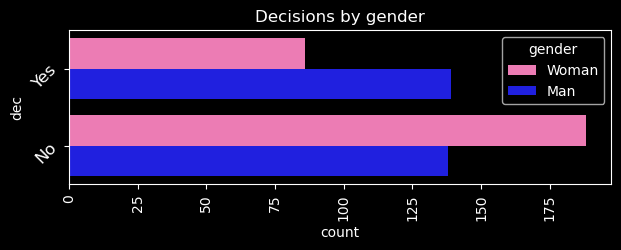

In [36]:
# Decisions by gender
fig = plt.figure(figsize = (7,2))
fig = sns.countplot(y = "dec", data = data_unique, hue = "gender", palette=palette).set(title="Decisions by gender")
fig = plt.xticks(rotation=90)
fig = plt.yticks (rotation = 45, fontsize = 12)

 Women tend to get more matched and say "NO" rather than men

Conclusion : 

 - We have 551 unique participants (277 men and 274 women)
 - They are between 20 and 30 years old
 - Most of them are caucasian
 - women give a huge importance to the race and the religion, unlike men
 - Men prefer attractive women. However, Women are looking for sincere, smart, and ambitious men
 - Women tend to get more matched and say "NO" rather than men


 

The interesting point to remember during this analysis is that even if most of the participating women participate in dates for to have fun night out, they are still demanding unlike the men.